### Importing the libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

### Loading the MNIST dataset.

In [5]:
# Loading the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of training and test data.
print("x_train shape: ", x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


### Visualization of the data.

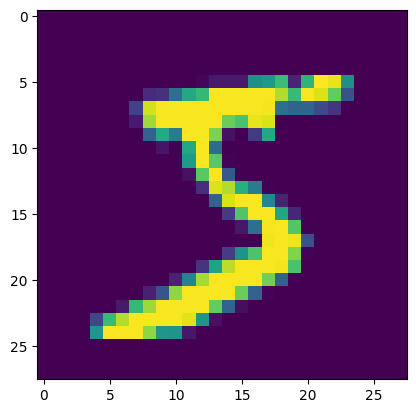

In [7]:
plt.imshow(x_train[0])

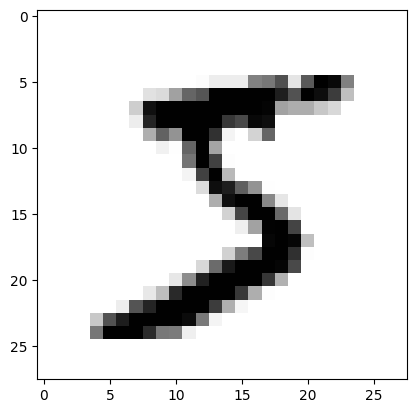

In [8]:
plt.imshow(x_train[0], cmap= plt.cm.binary)

### Check values of each pixel before normalization.

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Processing the data.

In [10]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

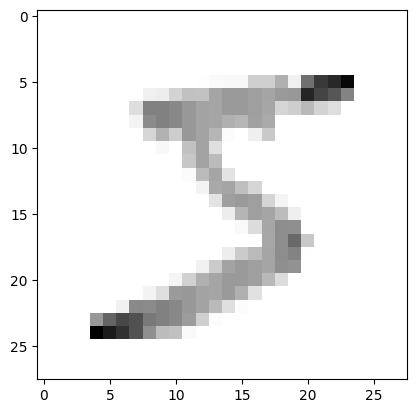

In [11]:
plt.imshow(x_train[0] , cmap= plt.cm.binary)

### Check values of each pixel after normalization.

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Check if training labels are properly correlated with the input training data. 

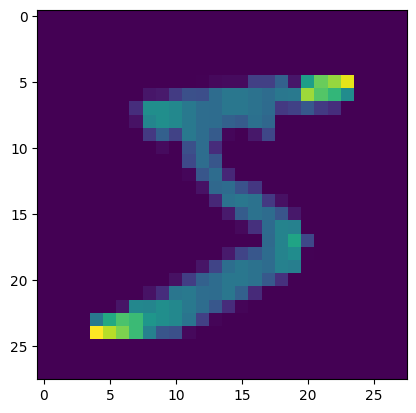

In [15]:
plt.imshow(x_train[0])

In [14]:
print(y_train[0])

5


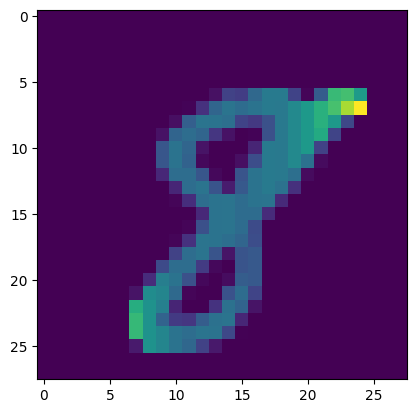

In [18]:
plt.imshow(x_train[55])

In [19]:
print(y_train[55])

8


As we can see, x_train[0] and x_train[55] contains the image depicting the number '5' and '8,' respectively. Also, we can see that y_train[0] and y_train[55] contain the digit image's label '5' and '8,' respectively.

### Resizing the image in order to apply Convolution operations.

In [20]:
img_size = 28

np_x_train = np.array(x_train).reshape(-1, img_size, img_size, 1)
np_x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)

print("Training shape: ", np_x_train.shape)
print("Test shape: ", np_x_test.shape)

Training shape:  (60000, 28, 28, 1)
Test shape:  (10000, 28, 28, 1)


## Creating Convolution Neural Network model using the MNIST dataset.

In [21]:
# Creating the neural network.
model = Sequential()

# Adding the first convolutional layer.
model.add(Conv2D(64, (3, 3), input_shape = np_x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the second convolutional layer.
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding the third convolutional layer.
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding first fully connected layer.
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Adding second fully connected layer.
model.add(Dense(10))
model.add(Activation('softmax'))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-03-22 12:00:31.437473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 12:00:31.437741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-03-22 12:01:20.720507: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-22 12:01:20.963278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9218

2023-03-22 12:01:40.195474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 21s 11ms/step - loss: 0.2493 - accuracy: 0.9219 - val_loss: 0.0936 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0800 - accuracy: 0.9755 - val_loss: 0.0662 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0567 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0618 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0517 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0535 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0540 - val_accura

### Display the accuracy and loss of the trained model.

In [25]:
loss, accuracy = model.evaluate(np_x_test, y_test, verbose=2)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

2023-03-22 12:05:27.197203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.0582 - accuracy: 0.9873 - 2s/epoch - 6ms/step
Test loss: 0.05821799114346504
Test accuracy: 0.9873000383377075


### Saving the model.

In [26]:
model.save('mnist_cnn.h5')

## Testing the model.

In [27]:
import cv2

In [28]:
# Reading the images.
img_four = cv2.imread('test_img/four.png')
img_eight = cv2.imread('test_img/eight.png')
img_nine = cv2.imread('test_img/nine.png')

# Resize the images.
img_four = cv2.resize(img_four, (28, 28))
img_eight = cv2.resize(img_eight, (28, 28))
img_nine = cv2.resize(img_nine, (28, 28))

### Visualization of the images.

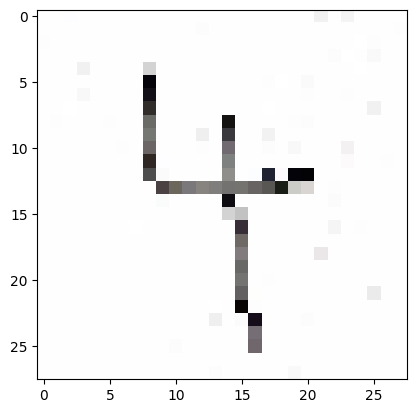

In [29]:
plt.imshow(img_four)

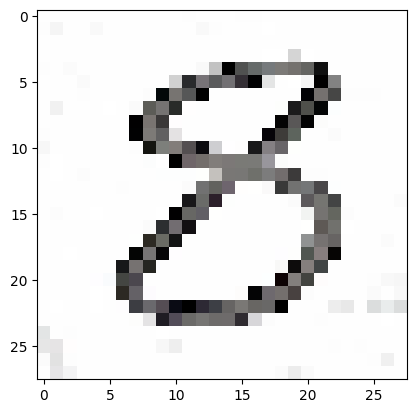

In [30]:
plt.imshow(img_eight)

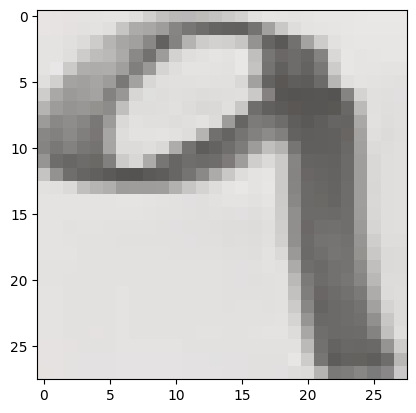

In [31]:
plt.imshow(img_nine)

In [32]:
gray_eight = cv2.cvtColor(img_eight, cv2.COLOR_BGR2GRAY)
edge_eight = cv2.Canny(gray_eight, 200, 300)
contours, hierarchy = cv2.findContours(edge_eight, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(edge_eight, cv2.COLOR_GRAY2BGR)

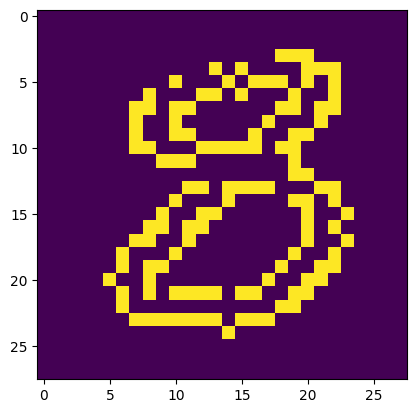

In [33]:
plt.imshow(edge_eight)

In [34]:
# # Otsu thresholding to obtain a binary image of the digits.
thresh, binary_eight = cv2.threshold(gray_eight, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.floodFill(binary_eight, None, (0, 0), 0)

(540,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         255, 255, 255, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0,
      

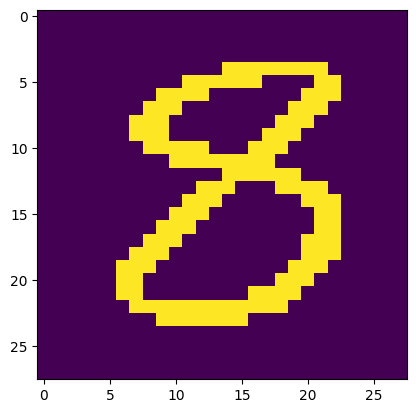

In [35]:
plt.imshow(binary_eight)

In [36]:
print(img_eight.shape)
print(gray_eight.shape)
print(edge_eight.shape)
print(contour_img.shape)

(28, 28, 3)
(28, 28)
(28, 28)
(28, 28, 3)


In [37]:
# Normalize the input image.
new_img = binary_eight / 255.0

In [38]:
# kernel operation of convolution layer.
new_img = np.array(new_img).reshape(-1, 28, 28, 1) 

In [39]:
new_img.shape

(1, 28, 28, 1)

In [40]:
pred = model.predict(new_img)
print(np.argmax(pred))

1/1 [==============================] - 0s 103ms/step
8


2023-03-22 12:19:44.263341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [41]:
gray_nine = cv2.cvtColor(img_nine, cv2.COLOR_BGR2GRAY)
edge_nine = cv2.Canny(gray_nine, 200, 300)
contours, hierarchy = cv2.findContours(edge_nine, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(edge_nine, cv2.COLOR_GRAY2BGR)

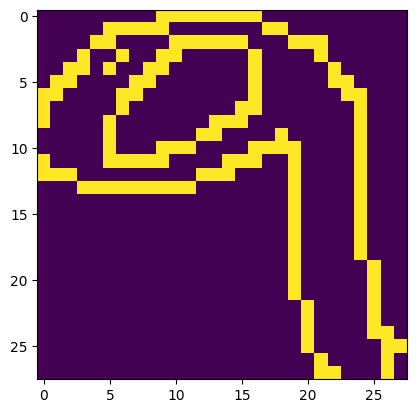

In [42]:
plt.imshow(edge_nine)

In [43]:
# # Otsu thresholding to obtain a binary image of the digits.
thresh, binary_nine = cv2.threshold(gray_nine, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.floodFill(binary_nine, None, (0, 0), 0)

(152,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,
           0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,
           0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,
           0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,
           0,   0],
        [  0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
           0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
      

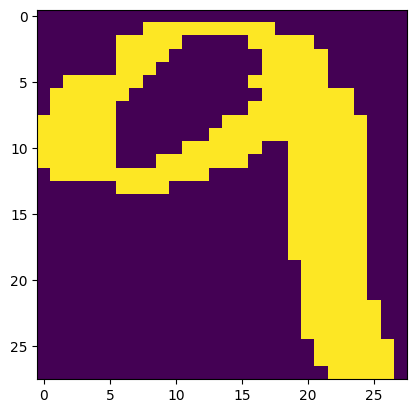

In [44]:
plt.imshow(binary_nine)

In [45]:
# Normalize the input image.
new_img = binary_nine / 255.0

In [46]:
# kernel operation of convolution layer.
new_img = np.array(new_img).reshape(-1, 28, 28, 1) 

In [48]:
pred = model.predict(new_img)
print(np.argmax(pred))

1/1 [==============================] - 0s 17ms/step
3
